In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prepare as prep
from scipy import stats
# import warnings
import warnings
warnings.filterwarnings('ignore')
# import models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# DataFrame Wine
df = pd.read_csv('wine_df.csv')
#Drop unneccessary columns 
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'sulphates'], inplace=True)
# renamed columns for simplicity
df.rename(columns={'fixed acidity':'fixed','volatile acidity':'volatile','citric acid':'citric',
           'residual sugar':'sugar','free sulfur dioxide':'fso2','total sulfur dioxide':'tso2'}, inplace=True)

In [33]:
# col_list of only floats and intergers
col_list = df.select_dtypes(include=['float64','int64']).columns[:-1] ; col_list

Index(['fixed', 'volatile', 'citric', 'sugar', 'chlorides', 'fso2', 'tso2',
       'density', 'pH', 'alcohol'],
      dtype='object')

In [4]:
#DataFrame of removed outliers
df, var_fences = p.remove_outliers(df)

NameError: name 'p' is not defined

In [29]:
df.head() # DataFrame first 5 columns

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6,0,1


In [32]:
# DataFrame of quality not equal to 3 and 9
df = df[(df['quality']!=3) & (df['quality']!=9)] ; df.head()

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6,0,1


In [7]:
# Getting dummies for quality column
baseline_table = pd.get_dummies(df, columns=['quality'])
# Droping columns for just dummies columns
baseline_table.drop(columns=['fixed','volatile','citric','sugar','chlorides',
                             'fso2','tso2','density','pH','alcohol'], inplace=True)

In [8]:
qual_4 = (baseline_table['quality_4']==0).mean()
qual_5 = (baseline_table['quality_5']==0).mean()
qual_6 = (baseline_table['quality_6']==0).mean()
qual_7 = (baseline_table['quality_7']==0).mean()

qual_4, qual_5, qual_6, qual_7

(0.9665738161559888, 0.6691426802847416, 0.5611265861962241, 0.833023831631074)

In [9]:
df = pd.get_dummies(df, columns=['type'])

In [10]:
X_train, y_train, X_val, y_val, X_test, y_test= prep.x_y_split(df, 'quality')

In [11]:
X_train.head()

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,type_red,type_white
1426,7.2,0.22,0.49,1.0,0.045,34.0,140.0,0.99000,3.05,12.7,0,1
2219,6.5,0.24,0.36,2.2,0.027,36.0,134.0,0.98980,3.28,12.5,0,1
3776,6.9,0.33,0.31,7.7,0.040,29.0,135.0,0.99226,3.11,12.3,0,1
4837,6.5,0.28,0.38,7.8,0.031,54.0,216.0,0.99154,3.03,13.1,0,1
879,6.9,0.12,0.36,2.2,0.037,18.0,111.0,0.99190,3.41,11.9,0,1


In [12]:
tree_train = []
tree_val = []
depth = []
for i in range(2, 21):
    train_tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    train_tree = train_tree.fit(X_train, y_train)
    
    y_pred = train_tree.predict(X_train)
    y_pred_prob = train_tree.predict_proba(X_train)
    
    tree_train.append(train_tree.score(X_train, y_train))
    tree_val.append(train_tree.score(X_val, y_val))
    depth.append(i)

In [13]:
scores = pd.DataFrame({'score':tree_train,
                       'type':'train',
                       'depth':depth})

In [14]:
val_scores = pd.DataFrame({'score':tree_val,
                           'type':'val',
                           'depth':depth})

In [15]:
scores = scores.append(val_scores)

In [16]:
scores

,score,type,depth
0,0.529017,train,2
1,0.541140,train,3
2,0.554295,train,4
3,0.569513,train,5
4,0.602012,train,6
5,0.631932,train,7
6,0.666495,train,8
7,0.707506,train,9
8,0.746969,train,10
9,0.784627,train,11


In [17]:
rfc_train = []
rfc_val = []
depth = []
for i in range(2, 21):
    rf = RandomForestClassifier(bootstrap=True, 
                                class_weight=None, 
                                criterion='gini',
                                min_samples_leaf=3,
                                n_estimators=100,
                                max_depth=i, 
                                random_state=77)
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    
    rfc_train.append(rf.score(X_train, y_train))
    rfc_val.append(rf.score(X_val, y_val))
    depth.append(i)

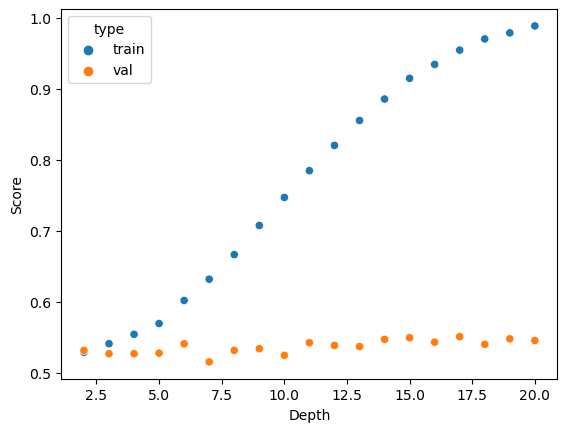

In [18]:
sns.scatterplot(x='depth', y='score', data=scores, hue='type')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

In [19]:
rfc_scores = pd.DataFrame({'score':rfc_train,
                           'type':'train',
                           'depth':depth})

val_rfc_scores = pd.DataFrame({'score':rfc_val,
                               'type':'val',
                               'depth':depth})

rfc_scores = rfc_scores.append(val_rfc_scores)

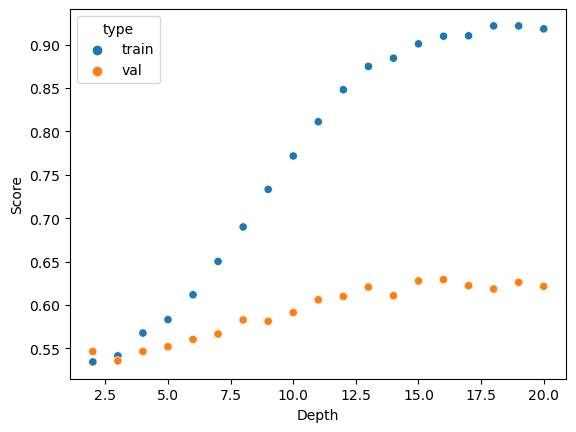

In [20]:
sns.scatterplot(x='depth', y='score', data=rfc_scores, hue='type')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

In [21]:
logit = LogisticRegression(C=1, random_state=42, solver='lbfgs')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('lbfgs')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

lbfgs
Train:  0.4725303069383544
Val:  0.48297213622291024


In [22]:
logit = LogisticRegression(C=1, random_state=42, solver='newton-cg')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('newton-cg')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

newton-cg
Train:  0.542687645086407
Val:  0.5363777089783281


In [23]:
logit = LogisticRegression(C=2, random_state=42, solver='liblinear')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('liblinear')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

liblinear
Train:  0.5354655661594016
Val:  0.5348297213622291


In [24]:
logit = LogisticRegression(C=1, random_state=42, solver='sag')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('sag')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

sag
Train:  0.4846530822801135
Val:  0.4969040247678019


In [25]:
logit = LogisticRegression(C=1, random_state=42, solver='saga')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('saga')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

saga
Train:  0.4686613360846015
Val:  0.49226006191950467


In [26]:
knn_train = []
knn_val = []
depth = []

for i in range(2, 51):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)
    
    depth.append(i)
    knn_train.append(knn.score(X_train, y_train))
    knn_val.append(knn.score(X_val, y_val))

In [27]:
knn_scores = pd.DataFrame({'score':knn_train,
                           'type':'train',
                           'depth':depth})

val_knn_scores = pd.DataFrame({'score':knn_val,
                               'type':'val',
                               'depth':depth})

knn_scores = knn_scores.append(val_knn_scores)

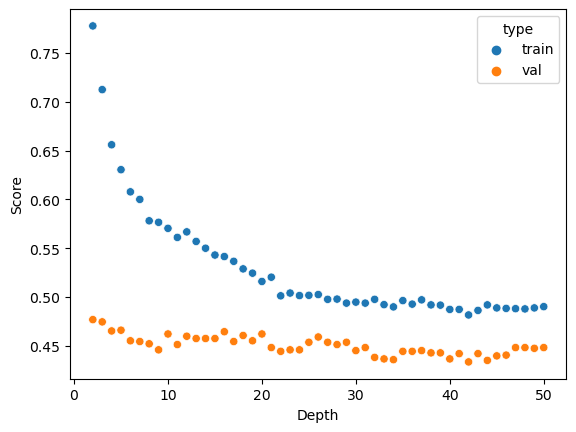

In [28]:
sns.scatterplot(x='depth', y='score', data=knn_scores, hue='type')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()